In [1]:
import numpy as np
import cv2
import glob
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

from google.colab import files
import zipfile
import os
uploaded = files.upload()
for filename in uploaded.keys():
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall('/content/road_conditions')
os.listdir('/content/road_conditions')

Saving dataset.zip to dataset.zip


['dataset']

In [4]:
import numpy as np
import cv2
import glob
def load_images_from_folder(folder):
    images = []
    for filename in glob.glob(folder + '/*.jpg'):
        img = cv2.imread(filename)
        if img is not None:
            img = cv2.resize(img, (224, 224))
            images.append(img)
    return np.array(images)
crack_images = load_images_from_folder('/content/road_conditions/cracks')
pothole_images = load_images_from_folder('/content/road_conditions/potholes')
crack_labels = np.zeros(len(crack_images))
pothole_labels = np.ones(len(pothole_images))
images = np.concatenate((crack_images, pothole_images), axis=0)
labels = np.concatenate((crack_labels, pothole_labels), axis=0)

In [5]:
# Check for the contents of the extracted directory
extracted_path = '/content/road_conditions'
if os.path.exists(extracted_path):
    print(f"Contents of {extracted_path}:")
    print(os.listdir(extracted_path))
else:
    print(f"The path {extracted_path} does not exist.")

Contents of /content/road_conditions:
['dataset']


In [6]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Set paths
base_folder_path = '/content/road_conditions'
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(
    base_folder_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    base_folder_path,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 337 images belonging to 1 classes.
Found 84 images belonging to 1 classes.


In [7]:
#Training the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [8]:
# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # Assuming three classes: Cracks, Normal, Potholes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10
10/10 [==============================] - 61s 6s/step - loss: 20.2886 - accuracy: 0.5246 - val_loss: 129.1100 - val_accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 56s 6s/step - loss: 457.8327 - accuracy: 0.4754 - val_loss: 579.0369 - val_accuracy: 0.0000e+00
Epoch 3/10
10/10 [==============================] - 67s 7s/step - loss: 2020.3533 - accuracy: 0.4754 - val_loss: 3325.1128 - val_accuracy: 0.0000e+00
Epoch 4/10
10/10 [==============================] - 59s 6s/step - loss: 13408.0801 - accuracy: 0.2656 - val_loss: 20484.1055 - val_accuracy: 0.0000e+00
Epoch 5/10
10/10 [==============================] - 58s 6s/step - loss: 17460.9434 - accuracy: 0.3115 - val_loss: 61532.2578 - val_accuracy: 0.0000e+00
Epoch 6/10
10/10 [==============================] - 58s 6s/step - loss: 143522.5781 - accuracy: 0.4197 - val_loss: 75204.3750 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 57s 6s/step - loss: 187974.4688 - accuracy: 0.2525 - v

In [9]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy:.2f}")

3/3 [==============================] - 5s 1s/step - loss: 6738572.0000 - accuracy: 1.0000
Validation Accuracy: 1.00


Total images found in /content/road_conditions/dataset/cracks: 361
1/1 [==============================] - 0s 196ms/step


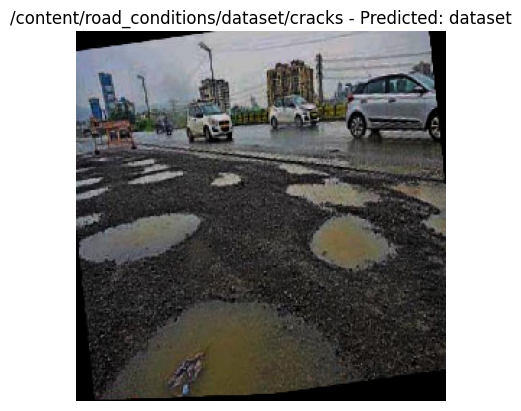

1/1 [==============================] - 0s 66ms/step


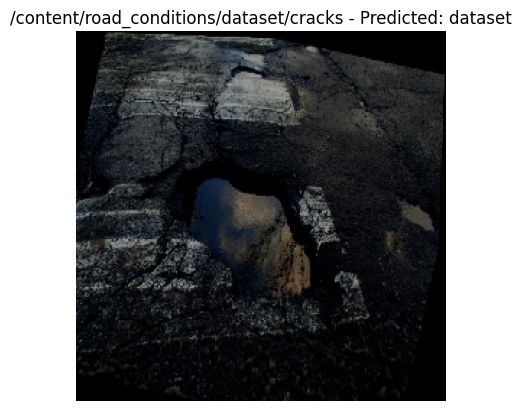

1/1 [==============================] - 0s 67ms/step


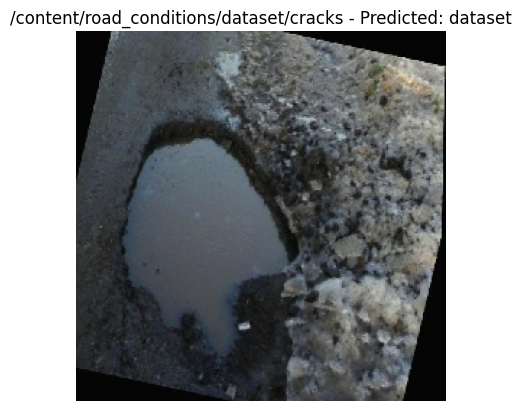

1/1 [==============================] - 0s 97ms/step


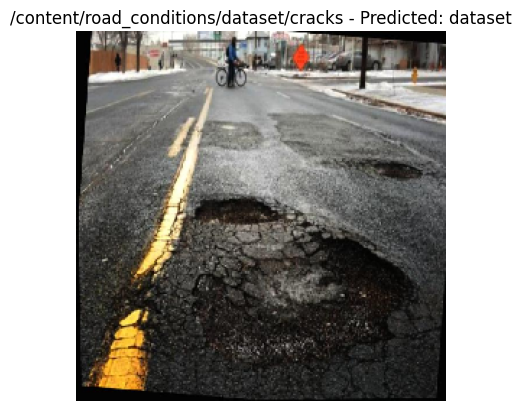

1/1 [==============================] - 0s 69ms/step


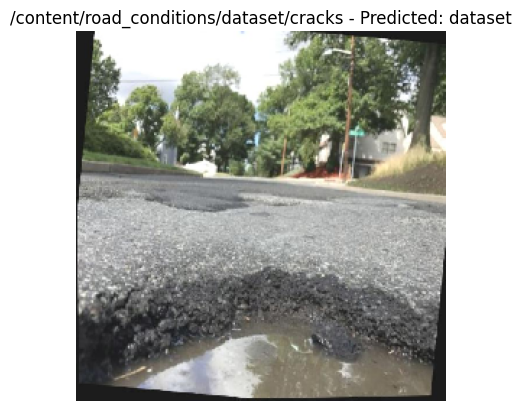

Total images found in /content/road_conditions/dataset/potholes: 60
1/1 [==============================] - 0s 65ms/step


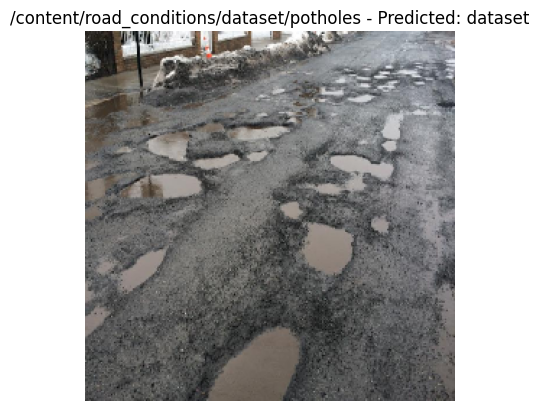

1/1 [==============================] - 0s 68ms/step


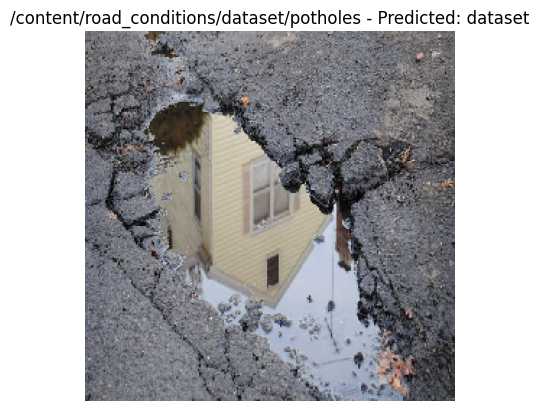

1/1 [==============================] - 0s 87ms/step


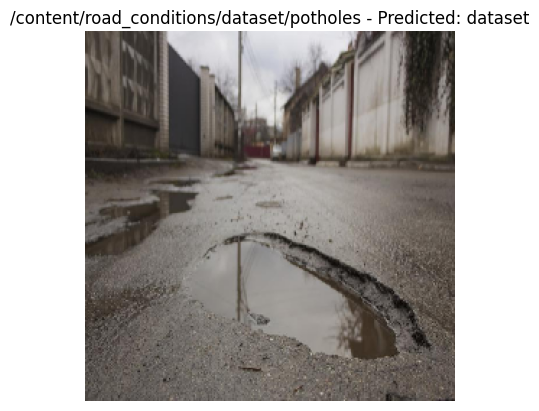

1/1 [==============================] - 0s 133ms/step


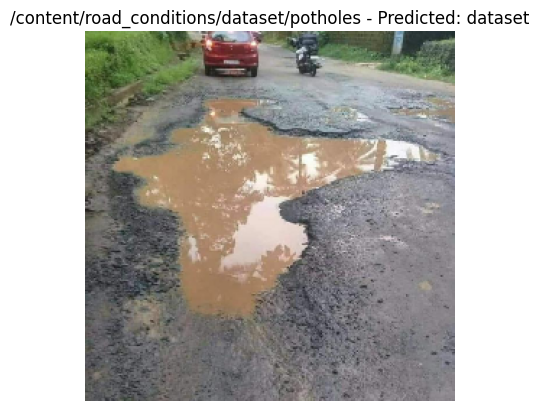

1/1 [==============================] - 0s 133ms/step


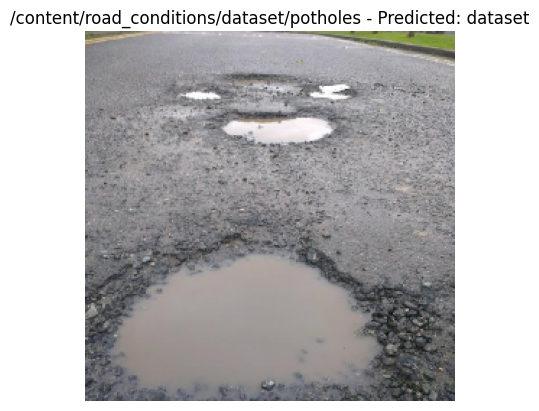

In [11]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def load_and_predict_images_from_folder(base_folder_path, model, target_size=(256, 256), num_images=5):
    """
    Load images from subfolders and predict their classes using the trained model.

    Parameters:
    base_folder_path (str): Path to the base folder containing subfolders.
    model (tf.keras.Model): The trained model for prediction.
    target_size (tuple): The target size for the images (default is (256, 256)).
    num_images (int): Number of images to display from each subfolder.

    Returns:
    None
    """
    subfolders = ['/content/road_conditions/dataset/cracks', '/content/road_conditions/dataset/potholes']

    for subfolder in subfolders:
        folder_path = os.path.join(base_folder_path, subfolder)
        if os.path.exists(folder_path):
            images = [img for img in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, img))]
            print(f"Total images found in {subfolder}: {len(images)}")

            # Display and predict the first num_images images
            for i, image_name in enumerate(images[:num_images]):
                img_path = os.path.join(folder_path, image_name)
                img = image.load_img(img_path, target_size=target_size)
                img_array = image.img_to_array(img)
                img_array = np.expand_dims(img_array, axis=0)
                img_array /= 255.0  # Normalize the image

                # Predict the class
                predictions = model.predict(img_array)
                class_indices = train_generator.class_indices
                class_labels = list(class_indices.keys())
                predicted_class = class_labels[np.argmax(predictions)]

                # Display the image with the predicted class
                plt.figure()
                plt.imshow(img)
                plt.title(f"{subfolder} - Predicted: {predicted_class}")
                plt.axis('off')  # Hide axes for better visualization
                plt.show()
        else:
            print(f"The folder {folder_path} does not exist.")

# Set the base folder path to the Training directory
base_folder_path = '/content/road_conditions'

# Call the function to load, predict, and display images
load_and_predict_images_from_folder(base_folder_path, model)